<a href="https://colab.research.google.com/github/yank00/E-commerce-Sales-Analysis-Python-Project-/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завантаження та опис датасету

In [563]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/files_mate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/files_mate


In [564]:
event_data = pd.read_csv("events.csv")
event_data.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [565]:
product_data = pd.read_csv("products.csv")
product_data.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [566]:
countries_data = pd.read_csv("countries.csv", keep_default_na=False,
    na_values=["N/A", "NULL", "null", "-", "", "#N/A"])
countries_data.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


##Опис колонок
1. events.csv:
    * Order ID - унікальний ідентифікатор замовлення.
    * Order Date	- дата, коли було зроблено замовлення.
    * Ship Date	-дата, коли замовлення було доставлено.
    * Order Priority	- відображає пріорітетність у виконанні замовленя і має такі значення: C - critical, H - high, M - medium, L - low.
    * Country Code	- зовнішній ключ з таблицею countries, скорочена назва країн
    * Product ID	- зовнішній ключ з таблицею products, унікальний ідентифікатор продукту.
    * Sales Channel	- спосіб як було зроблено замовлення, онлайн чи офлайн.
    * Units Sold	- кількість проданих одиниць продукту.
    * Unit Price	- ціна за одиницю продукту.
    * Unit Cost - собівартість одиниці продукту.
2. products.csv:
    * id - зовнішній ключ з таблицею events, унікальний ідентифікатор продукту.
    * item_type - категорія до якої відноситься даний продукт.
3. countries.csv:
    * name	- назва країни.
    * alpha-2	- скорочена назва країни з 2 букв.
    * alpha-3	- зовнішній ключ з таблицею events, скорочена назва країни з 3 букв.
    * region	- регіон в якому знаходиться дана країна.
    * sub-region - субрегіон в якому знаходиться дана країна.



#Перевірка та очищення даних

In [567]:
event_data.duplicated().any()

np.False_

In [568]:
product_data.duplicated().any()

np.False_

In [569]:
countries_data.duplicated().any()

np.False_

##events_data

In [570]:
print(event_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB
None


In [571]:
event_data.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


In [572]:
event_data["Order Date"] = pd.to_datetime(event_data["Order Date"])
event_data["Ship Date"] = pd.to_datetime(event_data["Ship Date"])
event_data["Order ID"] = event_data["Order ID"].astype(str)
event_data["Product ID"] = event_data["Product ID"].astype(str)

In [573]:
event_data["Country Code"] = event_data["Country Code"].fillna("Unknown")
event_data = event_data.dropna(subset=["Units Sold"])

In [574]:
event_data["Sales Channel"] = event_data["Sales Channel"].str.lower()

In [575]:
print(event_data["Units Sold"].median())
print(event_data["Unit Price"].median())
print(event_data["Unit Cost"].median())
event_data.describe()


4962.0
154.06
97.44


,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost
count,1328,1328,1328.000000,1328.000000,1328.000000
mean,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,4952.201807,264.913245,187.211521
min,2010-01-01 00:00:00,2010-01-10 00:00:00,2.000000,9.330000,6.920000
25%,2011-12-14 06:00:00,2012-01-02 00:00:00,2356.750000,81.730000,35.840000
50%,2013-10-15 12:00:00,2013-11-05 12:00:00,4962.000000,154.060000,97.440000
75%,2015-08-29 12:00:00,2015-10-04 18:00:00,7459.500000,437.200000,263.330000
max,2017-07-23 00:00:00,2017-08-31 00:00:00,9999.000000,668.270000,524.960000
std,NaN,NaN,2905.198996,217.386320,176.187801


Для початку змінили типи даних для потрібних стовпців: для дати замовлення та дати доставки - datetime, та для всіх id - string, оскільки це ідентифікатори, які не мають агрегуватись/обчислюватись. Щодо заповнення пустих колонок - пусті місця з кодом країни заповнені "Unknown" оскільки таких пропусків досить велика к-сть (82). 2 рядки з пропусками в Units Sold були видалені, оскільки датасет досить великий і їхня відсутність не буде зміщувати подальші результати обрахунків, в іншому разі, напевно, найбільш б коректним було знаходження медіани кількості проданих одиниць фільтруючи за категорією та країною які стоять в даних рядках. Також в колонці Sales Channel я помітила, що Online та Offline можуть починатись як з великої, так і з маленької букви, тому привела стовпець до нижнього регістру. Дублікатів в даній таблиці не виявлено.
Щодо аномалій: по великим значенням стандартного відхилення можна побачити що дані досить сильно розкидані, і порівнюючи медіану та середнє робимо такі висновки: в Units Sold майже нема аномальних значень оскільки медіана та середнє значення майже не відрізняються, в Unit Price та Unit Cost присутні аномальні високі значення, оскіль медіани нижче середніх значень.

##countries_data

In [576]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     249 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [577]:
countries_data.isnull().sum()

,0
name,0
alpha-2,0
alpha-3,0
region,1
sub-region,1


In [578]:
countries_data[countries_data["region"].isnull()]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN


In [579]:
event_data[event_data["Country Code"] == "ATA"]

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost


In [580]:
countries_data.dropna()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia
...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,Oceania,Polynesia
245,Western Sahara,EH,ESH,Africa,Northern Africa
246,Yemen,YE,YEM,Asia,Western Asia
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa


В даній таблиці всі типи даних прочитані правильно, оскільки попередньо в read_csv були використані потрібні атрибути щоб не прочитати код Намібії (NA) як відсутнє значення. Дублікатів не виявлено. Було знайдено 2 пропущені значення в одному рядку. Оскільки це були значення для регіону та субрегіону Антарктиди, які не можна було б на щось замінити, я подивилась чи були виконані замовлення з конкретної країни за допомогою фільтру та впевнилась що можу безпечно видалити даний рядок з таблиці.

##product_data

In [581]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [582]:
product_data.isnull().sum()

,0
id,0
item_type,0


In [583]:
product_data["id"] = product_data["id"].astype(str)

Тут дублікатів також не виявлено, пустих значень не було. Довелося тільки поміняти тип даних ідентифікатора на str.

#Об'єднання таблиць та видалення непотрібних стовпців

In [584]:
df = pd.merge(event_data, countries_data, left_on="Country Code", right_on="alpha-3", how="left")

In [585]:
df = pd.merge(df, product_data, left_on="Product ID", right_on="id", how="inner")

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   object        
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   object        
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
 10  name            1246 non-null   object        
 11  alpha-2         1246 non-null   object        
 12  alpha-3         1246 non-null   object        
 13  region          1246 non-null   object        
 14  sub-region      1246 non-null   object        
 15  id  

In [587]:
df.drop("id", axis=1, inplace=True)
df.drop("alpha-2", axis=1, inplace=True)
df.drop("alpha-3", axis=1, inplace=True)
df.drop("Country Code", axis=1, inplace=True)

In [588]:
df["name"] = df["name"].fillna("Unknown")
df["region"] = df["region"].fillna("Unknown")
df["sub-region"] = df["sub-region"].fillna("Unknown")

In [589]:
df.rename(columns={"name": "Country"}, inplace=True)
df.rename(columns={"region": "Region"}, inplace=True)
df.rename(columns={"item_type": "Category"}, inplace=True)
df.rename(columns={"sub-region": "Sub-region"}, inplace=True)

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   object        
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Product ID      1328 non-null   object        
 5   Sales Channel   1328 non-null   object        
 6   Units Sold      1328 non-null   float64       
 7   Unit Price      1328 non-null   float64       
 8   Unit Cost       1328 non-null   float64       
 9   Country         1328 non-null   object        
 10  Region          1328 non-null   object        
 11  Sub-region      1328 non-null   object        
 12  Category        1328 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 135.0+ KB


#Візуалізація та аналіз

##Ключові метрики

In [591]:
orders_cnt = df["Order ID"].count()
print(f"Count of orders: {orders_cnt}")
total_units_sold = df["Units Sold"].sum()
print(f"Total units sold: {round(total_units_sold)}")
avg_unit_price = df["Unit Price"].median()
print(f"Average unit price: {avg_unit_price}")
avg_unit_cost = df["Unit Cost"].median()
print(f"Average unit cost:{avg_unit_cost}")
total_revenue = (df["Units Sold"]*df["Unit Price"]).sum()
print(f"Total revenue: {total_revenue}")
total_cost = (df["Units Sold"]*df["Unit Cost"]).sum()
print(f"Total cost: {total_cost}")
total_profit = total_revenue - total_cost
print(f"Total profit: {total_profit}")
countries_cnt = len(df["Country"].unique())
print(f"Countries count:{countries_cnt}")
total_margin = total_profit/total_revenue*100
print(f"Total margin:{round(total_margin, 2)}%")
total_avg_check = round(total_revenue / orders_cnt, 2)
print(f"Average check:{total_avg_check}")
profit_per_order = total_profit / orders_cnt
print(f"Average profit per order: {round(profit_per_order, 2)}")
roi = (total_profit / (df["Units Sold"] * df["Unit Cost"]).sum()) * 100
print(f"ROI: {round(roi, 2)}%")
avg_markup = ((df["Unit Price"] - df["Unit Cost"]) / df["Unit Cost"]).mean() * 100
print(f"Average markup: {round(avg_markup, 2)}%")
avg_order_size = df["Units Sold"].mean()
print(f"Average order size: {round(avg_order_size, 2)} units")
max_check = (df["Units Sold"] * df["Unit Price"]).max()
print(f"Max order value: {max_check}")
min_check = (df["Units Sold"] * df["Unit Price"]).min()
print(f"Min order value: {min_check}")

Count of orders: 1328
Total units sold: 6576524
Average unit price: 154.06
Average unit cost:97.44
Total revenue: 1702129408.21
Total cost: 1200694949.21
Total profit: 501434459.0
Countries count:46
Total margin:29.46%
Average check:1281723.95
Average profit per order: 377586.19
ROI: 41.76%
Average markup: 60.31%
Average order size: 4952.2 units
Max order value: 6672675.95
Min order value: 503.82


##Аналіз в розрізі категорій товарів

In [592]:
df['Total Revenue'] = df['Units Sold'] * df['Unit Price']
df['Total Cost'] = df['Units Sold'] * df['Unit Cost']
df['Profit'] = df['Total Revenue'] - df['Total Cost']

In [593]:
df.head()

,Order ID,Order Date,Ship Date,Order Priority,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Country,Region,Sub-region,Category,Total Revenue,Total Cost,Profit
0,100640618,2014-10-08,2014-10-18,M,2103,online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,2103,offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,7940,online,4693.0,668.27,502.54,Unknown,Unknown,Unknown,Household,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,2455,online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,1270,offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68


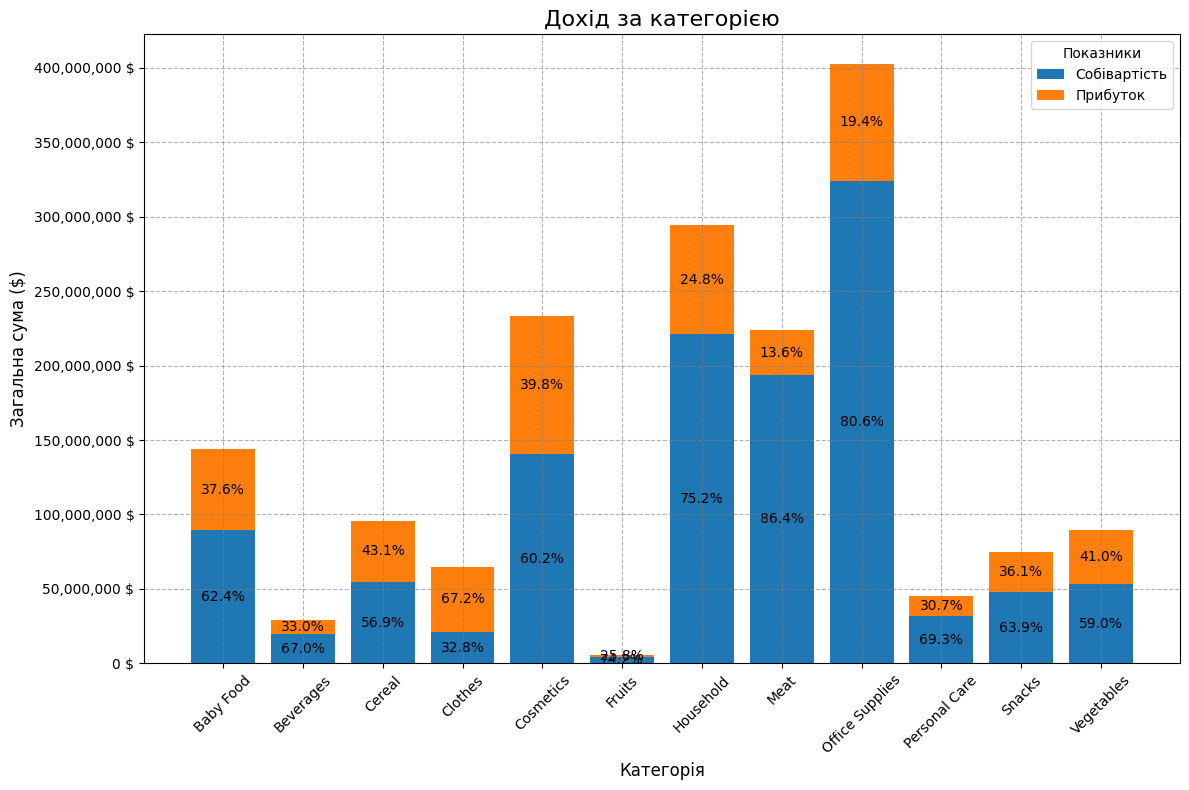

In [594]:
import matplotlib.ticker as mtick

category_summary = df.groupby("Category")[["Profit", "Total Cost", "Total Revenue"]].sum().reset_index()


plt.style.use("tableau-colorblind10")
plt.figure(figsize=(12, 8))
categories = category_summary["Category"]
x = np.arange(len(categories))
total_revenue = category_summary["Total Revenue"]


plt.grid(True, linestyle="--", color="gray", alpha=0.6)

plt.bar(x, category_summary["Total Cost"], label="Собівартість", color="#1f77b4")
plt.bar(x, category_summary["Profit"], bottom=category_summary["Total Cost"], label="Прибуток", color="#ff7f0e")

for i in range(len(categories)):
        profit_percent = (category_summary["Profit"][i] / total_revenue[i]) * 100
        cost_percent = (category_summary["Total Cost"][i] / total_revenue[i]) * 100
        plt.text(x[i], category_summary["Total Cost"][i] / 2, f'{cost_percent:.1f}%', ha="center", va="center", fontsize=10)
        plt.text(x[i], category_summary["Total Cost"][i] + category_summary["Profit"][i] / 2, f'{profit_percent:.1f}%', ha="center", va="center", fontsize=10)

plt.title("Дохід за категорією", fontsize=16)
plt.xlabel("Категорія", fontsize=12)
plt.ylabel("Загальна сума ($)", fontsize=12)
plt.xticks(x, categories, rotation=45)

# Форматування осі Y для відображення повних чисел
formatter = mtick.FuncFormatter(lambda y, p: f'{y:,.0f} $')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title="Показники")
plt.tight_layout()
plt.show()

За загальним доходом переважають такі категорії товарів як: Office Suppliers, Household, Cosmetics. Найнижчий дохід приносять Personal Care, Beverages, Fruits. За відсотком чистого прибутку переважають Clothes, Cereal, Vegetables, найнижчий прибуток мають Meat, Office Supplies, Fruits. Найбільшу собівартість мають категоріїї: Office Supplies, Meat, Household, Fruits - тобто найменшу нацынку. Найменшу собівартість і найбільшу націнку мають категорії Clothes, Cereal, Vegetables.

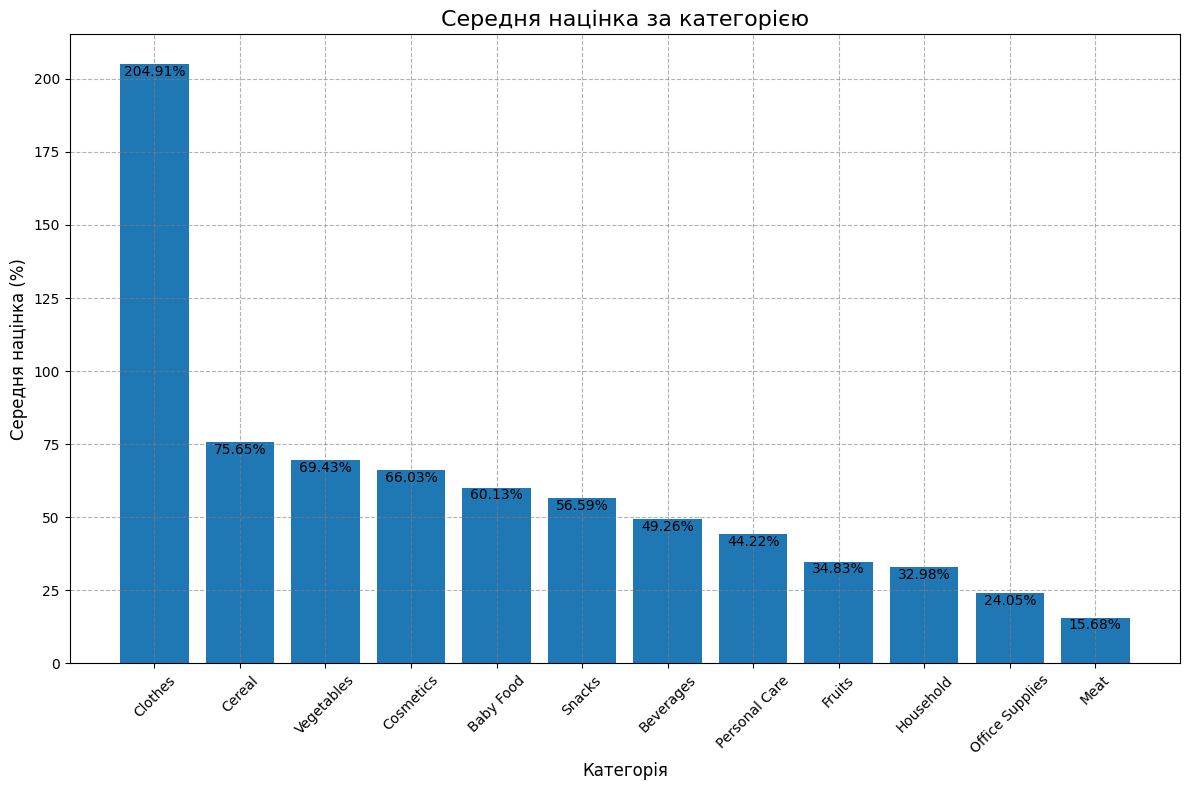

In [595]:
df["Markup"] = (df["Unit Price"] - df["Unit Cost"])/df["Unit Cost"]*100
avg_category_markup = df.groupby("Category")["Markup"].median().sort_values(ascending=False).reset_index()

plt.style.use("tableau-colorblind10")
plt.figure(figsize=(12, 8))

plt.grid(True, linestyle="--", color="gray", alpha=0.6)
bars=plt.bar(avg_category_markup["Category"], avg_category_markup["Markup"], color="#1f77b4")

plt.title("Середня націнка за категорією", fontsize=16)
plt.xlabel("Категорія", fontsize=12)
plt.ylabel("Середня націнка (%)", fontsize=12)
plt.xticks(rotation=45)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 5,
        f"{round(bar.get_height(), 2)}%",
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

Тут наочно показаний сам середній відсоток націнки на продукти даних категорій.

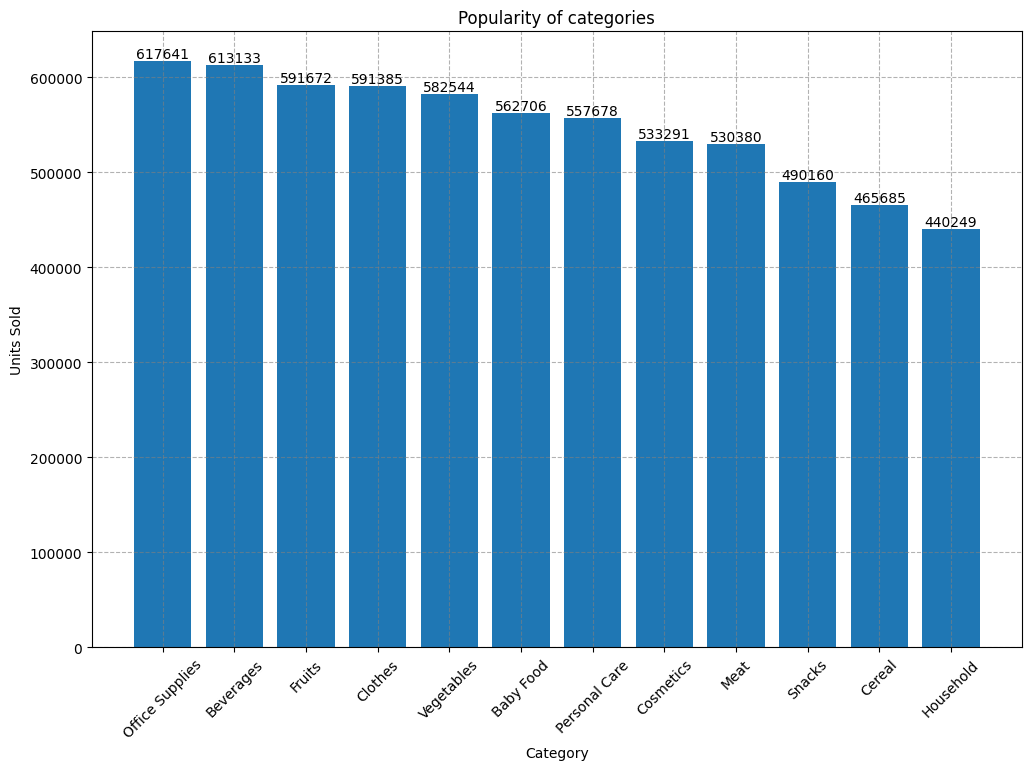

In [596]:
popularity_of_categories = df.groupby("Category")["Units Sold"].sum().sort_values(ascending=False).reset_index()
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(12, 8))
plt.grid(True, linestyle="--", color="gray", alpha=0.6)
bars = plt.bar(popularity_of_categories["Category"], popularity_of_categories["Units Sold"], color="#1f77b4")
plt.title("Popularity of categories")
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.xticks( rotation=45)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 40,
        f"{round(bar.get_height())}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
    )

plt.show()

Найбільш популярними категоріями за загальними продажами є Office Supplies, Beverages, Fruits. Найменш: Snacks, Cereal, Household

In [597]:
df["Shipping Time"]=df["Ship Date"]-df["Order Date"]
df["Shipping Time"] = df["Shipping Time"].dt.days

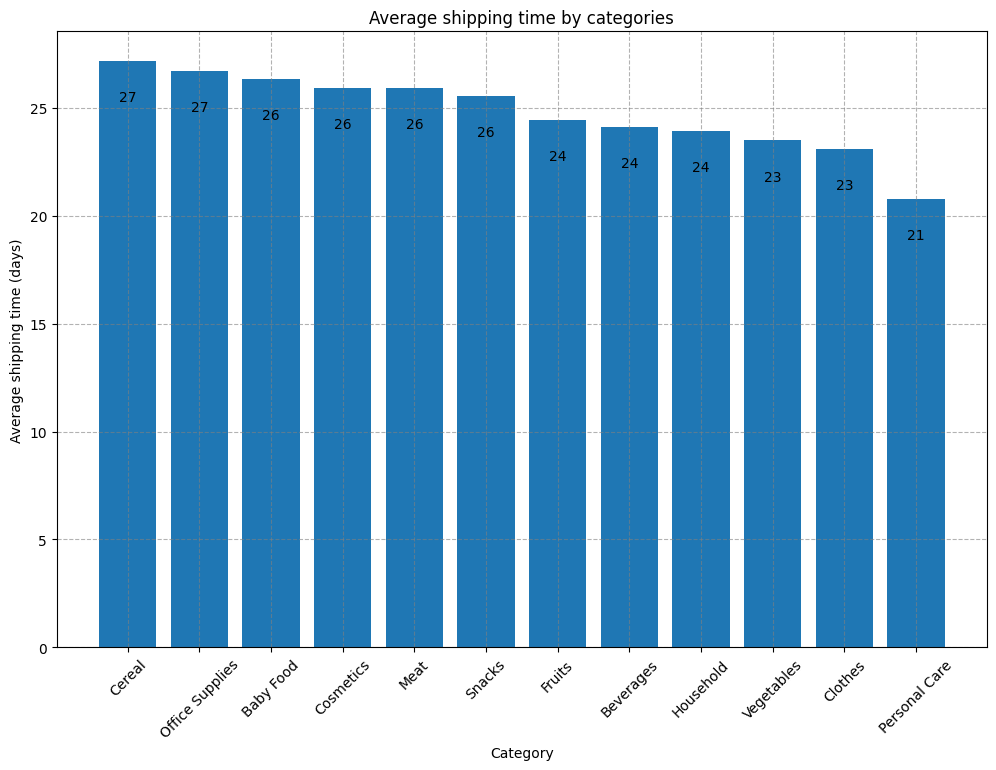

In [598]:
category_shipping_time = df.groupby("Category")["Shipping Time"].mean().sort_values(ascending=False).reset_index()
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(12, 8))
plt.grid(True, linestyle="--", color="gray", alpha=0.6)
bars = plt.bar(category_shipping_time["Category"], category_shipping_time["Shipping Time"], color="#1f77b4")
plt.title("Average shipping time by categories")
plt.xlabel("Category")
plt.ylabel("Average shipping time (days)")
plt.xticks( rotation=45)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 2,
        f"{round(bar.get_height())}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
    )

plt.show()

В середньому найдовше доставляти доводиться продукти таких категорій як Cereal, Office Supplies, швидше - Vegetables, Clothes, Personal Care

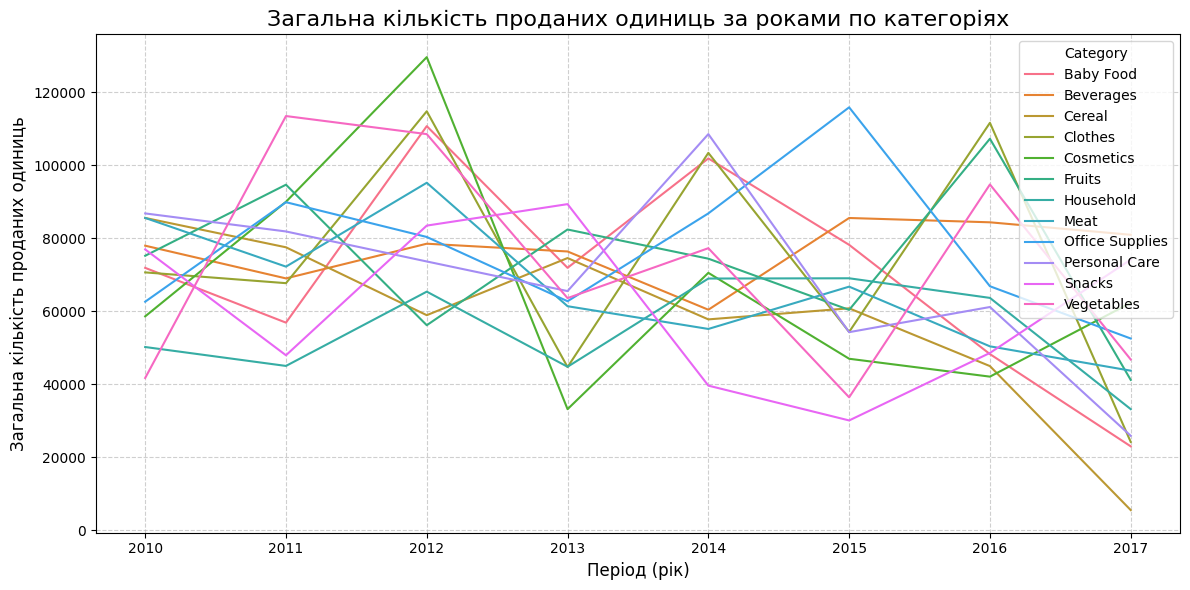

In [599]:
df["Order Year"] = df["Order Date"].dt.to_period("Y")


year_summary = df.groupby(["Order Year", "Category"])["Units Sold"].sum().reset_index()


year_summary["Order Year"] = year_summary["Order Year"].astype(str)


plt.figure(figsize=(12, 6))
sns.lineplot(data=year_summary, x="Order Year", y="Units Sold", hue="Category")

plt.title("Загальна кількість проданих одиниць за роками по категоріях", fontsize=16)
plt.xlabel("Період (рік)", fontsize=12)
plt.ylabel("Загальна кількість проданих одиниць", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

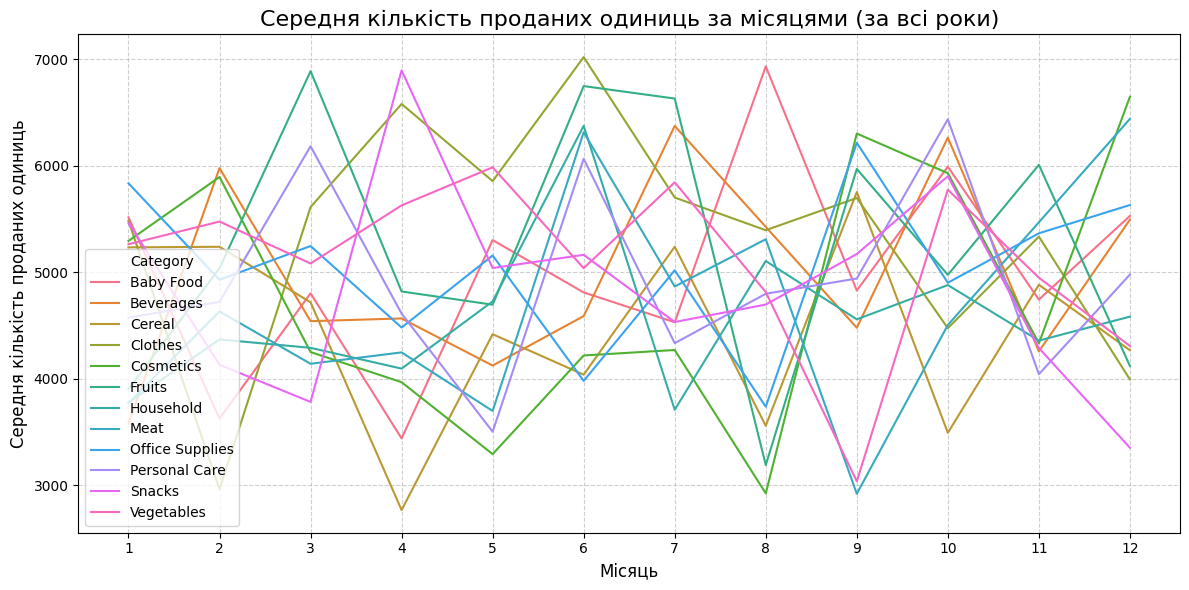

In [600]:
df["Order Month"] = df["Order Date"].dt.month

monthly_avg_sales = df.groupby(["Order Month", "Category"])["Units Sold"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_sales, x="Order Month", y="Units Sold", hue="Category")

plt.title("Середня кількість проданих одиниць за місяцями (за всі роки)", fontsize=16)
plt.xlabel("Місяць", fontsize=12)
plt.ylabel("Середня кількість проданих одиниць", fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Візьмемо для аналізу продажів по місяцях 3 найрентабельніші категорії: Clothes - досягає свого піку в червні, також досить популярний до придбання в весняний період, ближче до зимнього - спадає. Cereal -досить популярна категорія в зимній період, Vegetables - здебільшого популярні протягом року, помітне сильне спадання в вересні.

/tmp/ipython-input-3422871185.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_avg_sales = df.groupby(["Order Weekday", "Category"])["Units Sold"].mean().reset_index()


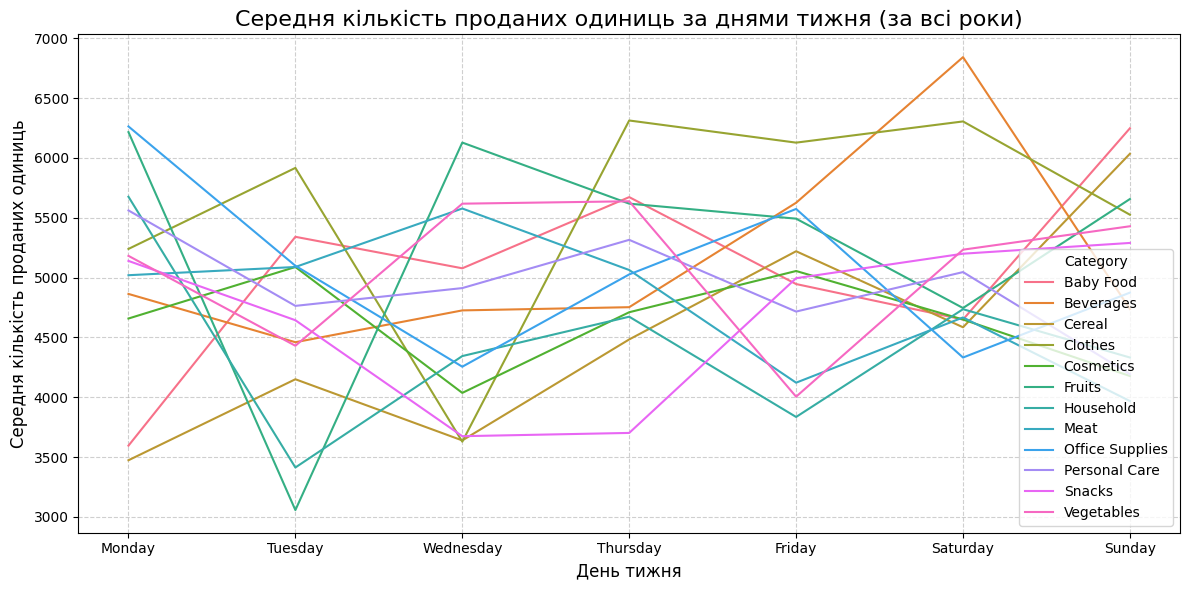

In [601]:
df["Order Weekday"] = df["Order Date"].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Order Weekday'] = pd.Categorical(df['Order Weekday'], categories=weekday_order, ordered=True)

weekly_avg_sales = df.groupby(["Order Weekday", "Category"])["Units Sold"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_avg_sales, x="Order Weekday", y="Units Sold", hue="Category")

plt.title("Середня кількість проданих одиниць за днями тижня (за всі роки)", fontsize=16)
plt.xlabel("День тижня", fontsize=12)
plt.ylabel("Середня кількість проданих одиниць", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

З цікавих тенденцій з аналізу продаж категорій по дням тижня: напої люблять купляти здебільшого в суботу, п'ятниця-вихідні - дні придбання одягу, снеки закуповують здебільшого на початку або в кінці тижня, м'ясо та побутові речі теж здебільшого купують на початку тижня

##Аналіз в розрізі країн та регіонів

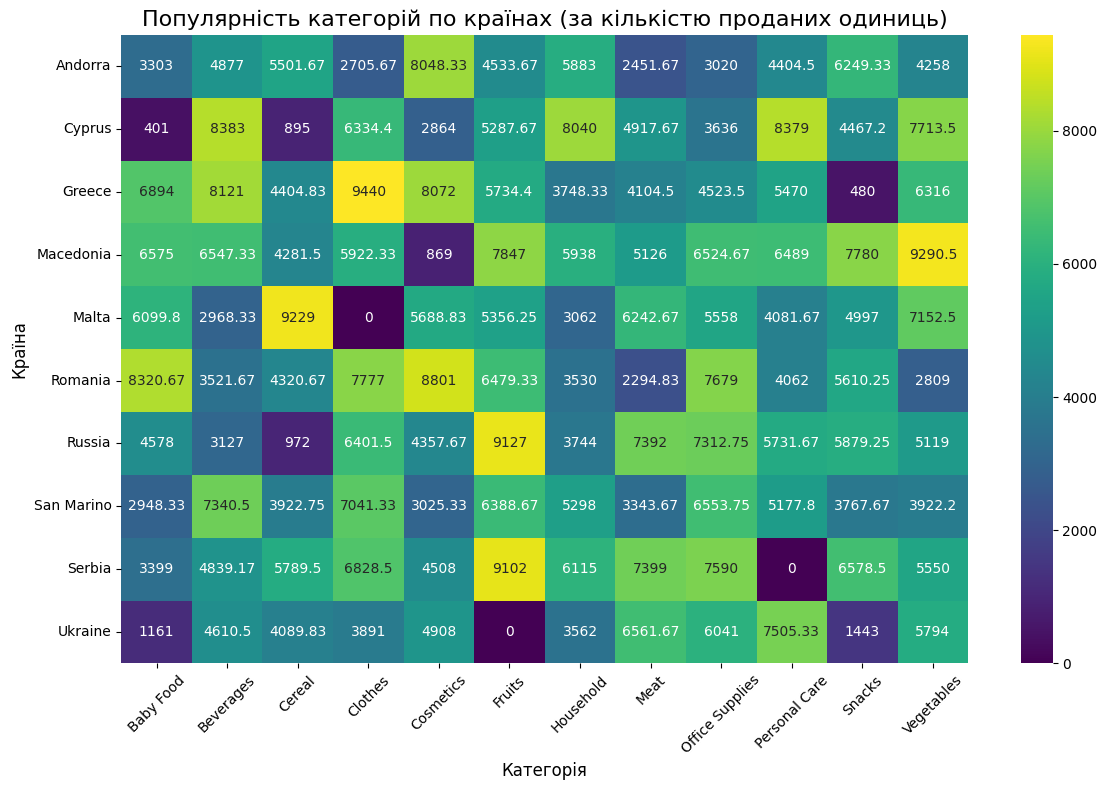

In [602]:
df_counties_cleaned = df[df['Country'] != 'Unknown']
top_10_countries = df_counties_cleaned.groupby("Country")["Units Sold"].sum().nlargest(10).index
filtered_df = df_counties_cleaned[df_counties_cleaned["Country"].isin(top_10_countries)]

heatmap_data = filtered_df.pivot_table(
    index="Country",
    columns="Category",
    values="Units Sold",
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='g',
    cmap='viridis'
)

plt.title("Популярність категорій по країнах (за кількістю проданих одиниць)", fontsize=16)
plt.ylabel("Країна", fontsize=12)
plt.xlabel("Категорія", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

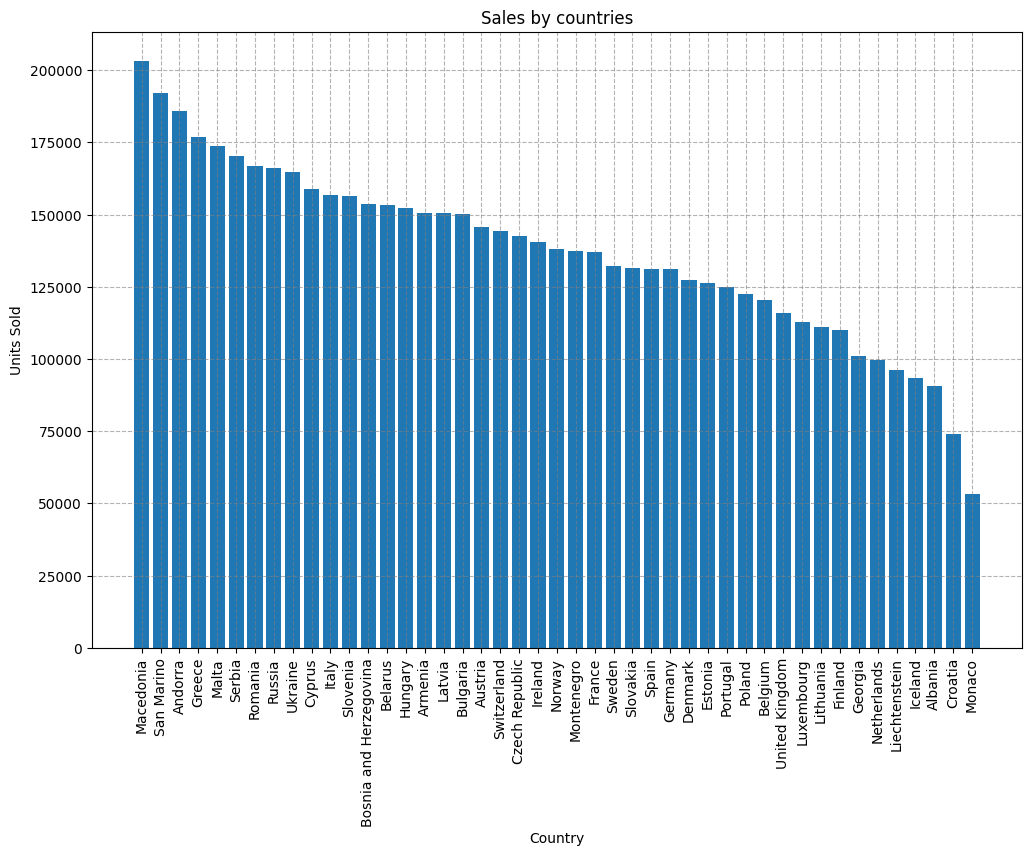

In [603]:
units_sold_by_country = df_counties_cleaned.groupby("Country")["Units Sold"].sum().sort_values(ascending=False).reset_index()
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(12, 8))
plt.grid(True, linestyle="--", color="gray", alpha=0.6)
bars = plt.bar(units_sold_by_country["Country"], units_sold_by_country["Units Sold"], color="#1f77b4")
plt.title("Sales by countries")
plt.xlabel("Country")
plt.ylabel("Units Sold")
plt.xticks( rotation=90)

plt.show()

Найбільші продажі в таких країн як: Македонія, Сан-Марино, Греція. Найменші - Монакоб Хорватія, Албанія.

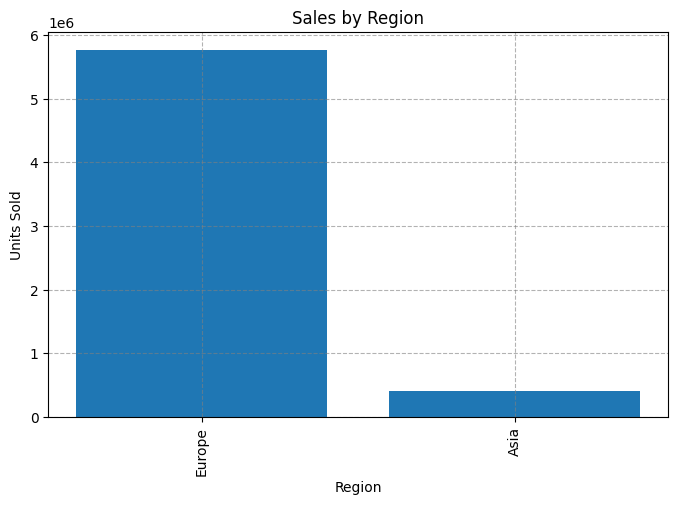

In [604]:
units_sold_by_region = df_counties_cleaned.groupby("Region")["Units Sold"].sum().sort_values(ascending=False).reset_index()
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(8, 5))
plt.grid(True, linestyle="--", color="gray", alpha=0.6)
bars = plt.bar(units_sold_by_region["Region"], units_sold_by_region["Units Sold"], color="#1f77b4")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Units Sold")
plt.xticks( rotation=90)

plt.show()

І звичайно - продажі в Європі набагато більші ніж в країни Азії

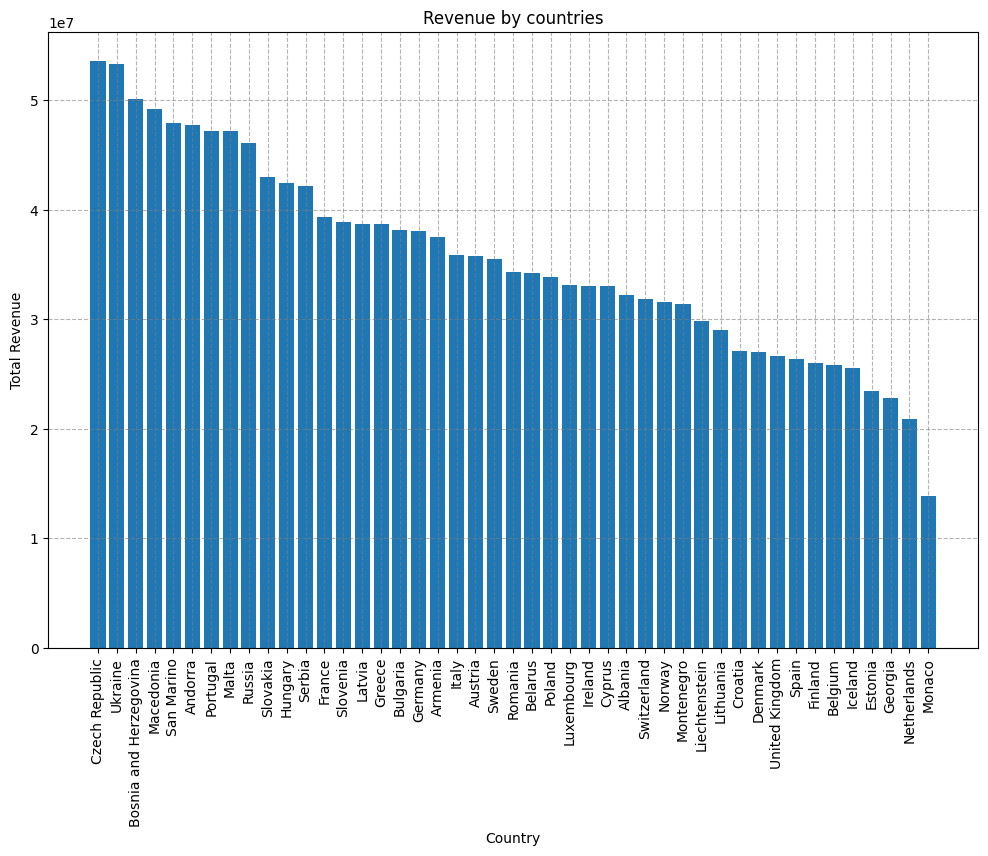

In [605]:
revenue_by_country = df_counties_cleaned.groupby("Country")["Total Revenue"].sum().sort_values(ascending=False).reset_index()
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(12, 8))
plt.grid(True, linestyle="--", color="gray", alpha=0.6)
bars = plt.bar(revenue_by_country["Country"], revenue_by_country["Total Revenue"], color="#1f77b4")
plt.title("Revenue by countries")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks( rotation=90)

plt.show()

Найбільший дохід компанія отримує від таких країн як Чехія, Україна, Боснія і Герцоговина. Найменший - Монако, Нідерланди, Грузія

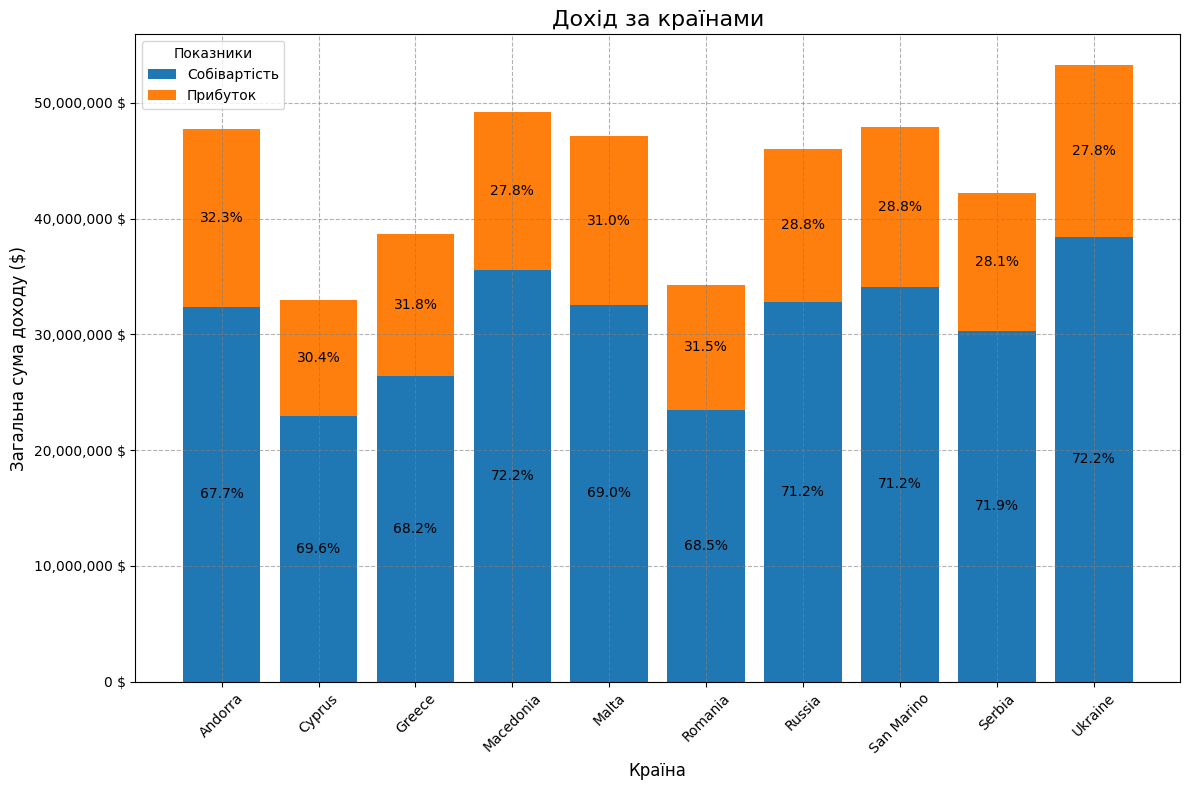

In [606]:
country_summary = filtered_df.groupby("Country")[["Profit", "Total Cost", "Total Revenue"]].sum().reset_index()


plt.style.use("tableau-colorblind10")
plt.figure(figsize=(12, 8))
categories = country_summary["Country"]
x = np.arange(len(categories))
total_revenue = country_summary["Total Revenue"]


plt.grid(True, linestyle="--", color="gray", alpha=0.6)

plt.bar(x, country_summary["Total Cost"], label="Собівартість", color="#1f77b4")
plt.bar(x, country_summary["Profit"], bottom=country_summary["Total Cost"], label="Прибуток", color="#ff7f0e")

for i in range(len(categories)):
        profit_percent = (country_summary["Profit"][i] / total_revenue[i]) * 100
        cost_percent = (country_summary["Total Cost"][i] / total_revenue[i]) * 100
        plt.text(x[i], country_summary["Total Cost"][i] / 2, f'{cost_percent:.1f}%', ha="center", va="center", fontsize=10)
        plt.text(x[i], country_summary["Total Cost"][i] + country_summary["Profit"][i] / 2, f'{profit_percent:.1f}%', ha="center", va="center", fontsize=10)

plt.title("Дохід за країнами", fontsize=16)
plt.xlabel("Країна", fontsize=12)
plt.ylabel("Загальна сума доходу ($)", fontsize=12)
plt.xticks(x, categories, rotation=45)

# Форматування осі Y для відображення повних чисел
formatter = mtick.FuncFormatter(lambda y, p: f'{y:,.0f} $')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title="Показники")
plt.tight_layout()
plt.show()

Аналізуючи найбільші країни по продажам, майже всі вони мають приблизно одинаковий відсоток чистого прибутку - 27%-32%.

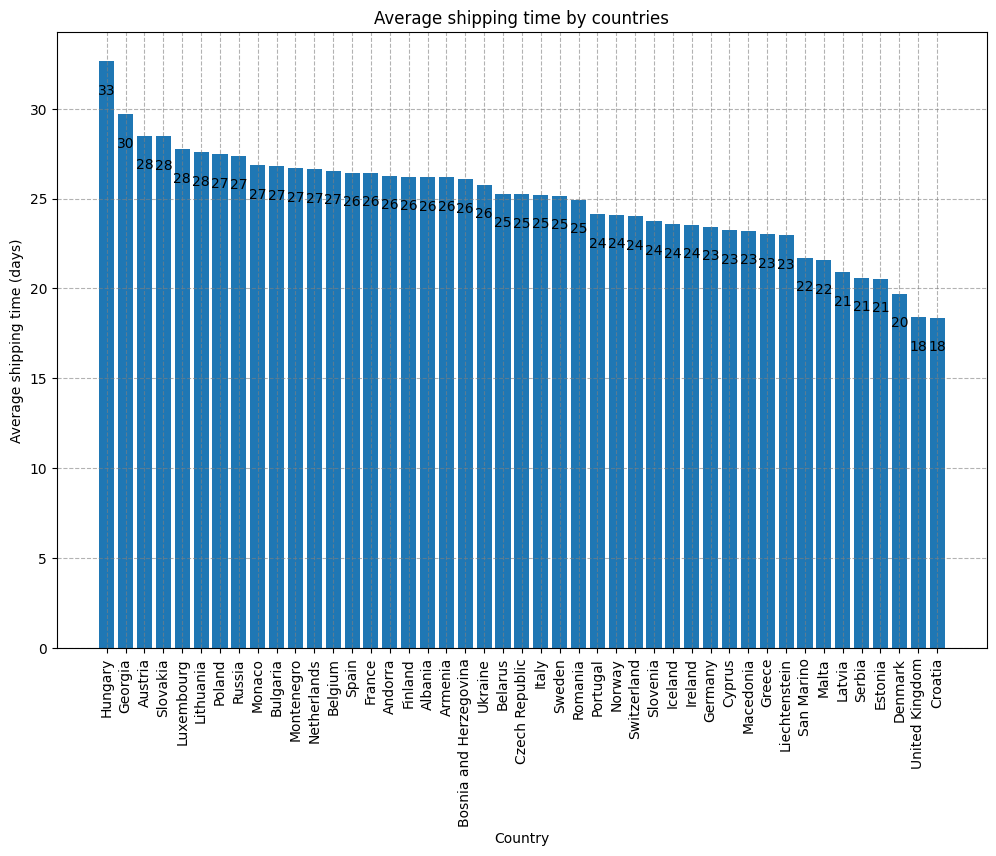

In [607]:
country_shipping_time = df_counties_cleaned.groupby("Country")["Shipping Time"].mean().sort_values(ascending=False).reset_index()
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(12, 8))
plt.grid(True, linestyle="--", color="gray", alpha=0.6)
bars = plt.bar(country_shipping_time["Country"], country_shipping_time["Shipping Time"], color="#1f77b4")
plt.title("Average shipping time by countries")
plt.xlabel("Country")
plt.ylabel("Average shipping time (days)")
plt.xticks( rotation=90)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 2,
        f"{round(bar.get_height())}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,

    )

plt.show()

Найдовше замовлення йде до таких країн як Угорщина та Грузія, найшвидше - Хорватія, Великобританія, Денмарк

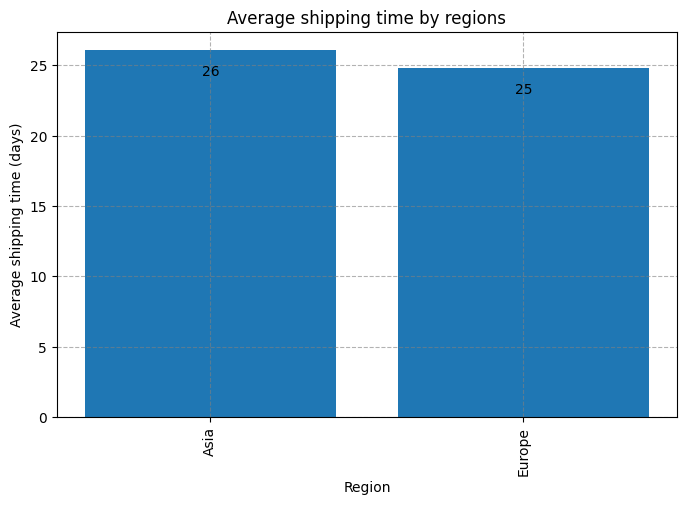

In [608]:
region_shipping_time = df_counties_cleaned.groupby("Region")["Shipping Time"].mean().sort_values(ascending=False).reset_index()
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(8, 5))
plt.grid(True, linestyle="--", color="gray", alpha=0.6)
bars = plt.bar(region_shipping_time["Region"], region_shipping_time["Shipping Time"], color="#1f77b4")
plt.title("Average shipping time by regions")
plt.xlabel("Region")
plt.ylabel("Average shipping time (days)")
plt.xticks( rotation=90)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 2,
        f"{round(bar.get_height())}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,

    )

plt.show()

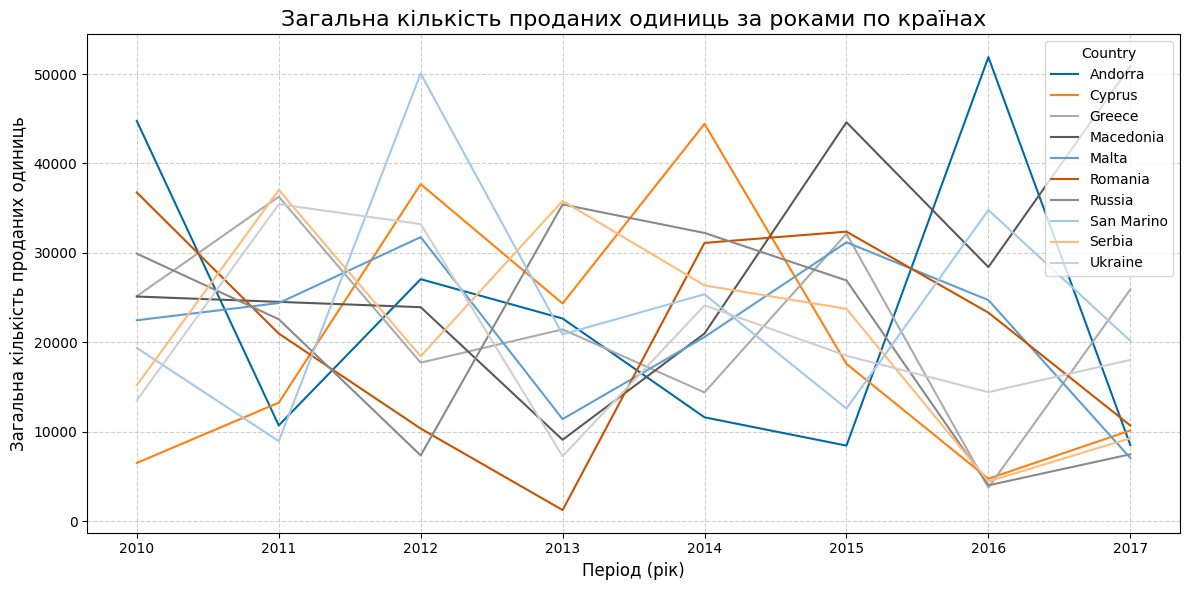

In [609]:
year_summary_country = filtered_df.groupby(["Order Year", "Country"])["Units Sold"].sum().reset_index()


year_summary_country["Order Year"] = year_summary_country["Order Year"].astype(str)


plt.figure(figsize=(12, 6))
sns.lineplot(data=year_summary_country, x="Order Year", y="Units Sold", hue="Country")

plt.title("Загальна кількість проданих одиниць за роками по країнах", fontsize=16)
plt.xlabel("Період (рік)", fontsize=12)
plt.ylabel("Загальна кількість проданих одиниць", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

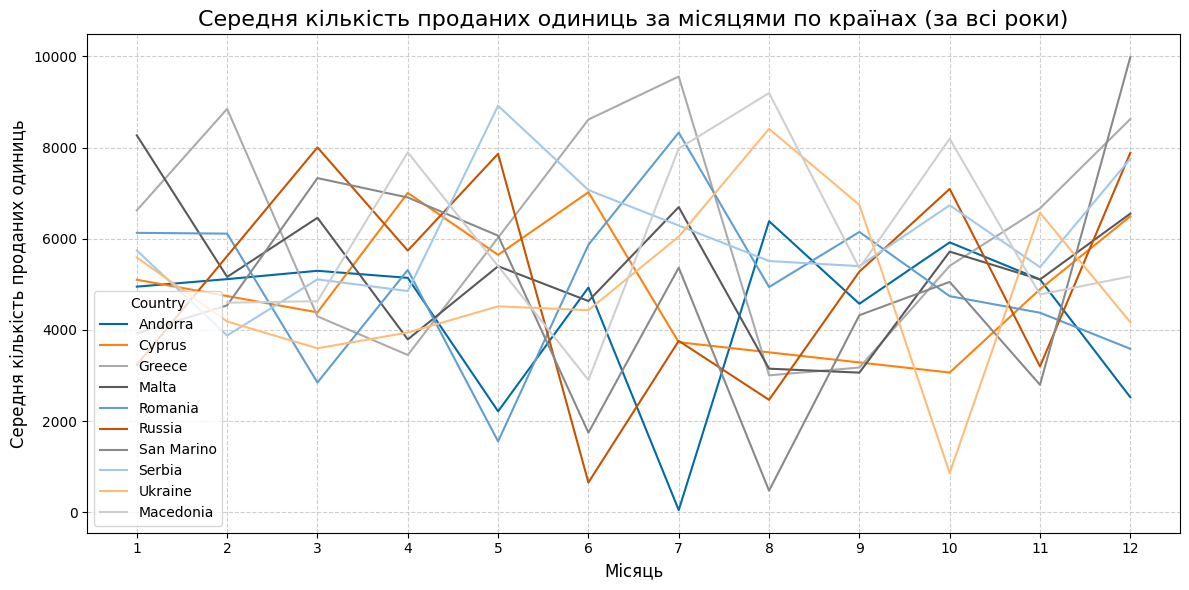

In [610]:
monthly_avg_sales_country = filtered_df.groupby(["Order Month", "Country"])["Units Sold"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_sales_country, x="Order Month", y="Units Sold", hue="Country")

plt.title("Середня кількість проданих одиниць за місяцями по країнах (за всі роки)", fontsize=16)
plt.xlabel("Місяць", fontsize=12)
plt.ylabel("Середня кількість проданих одиниць", fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

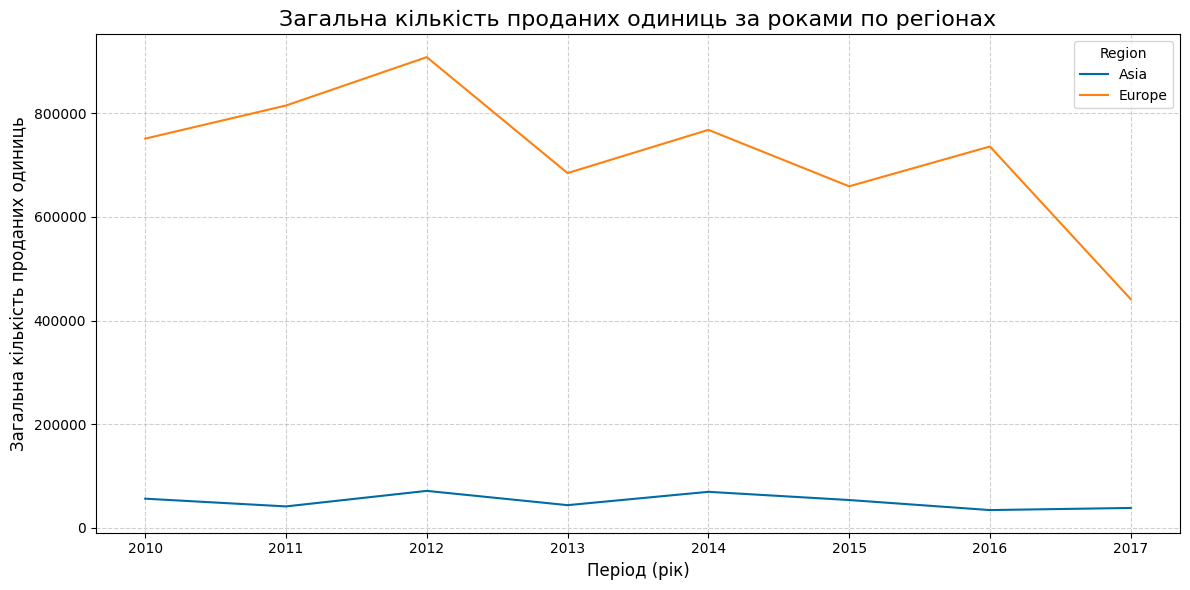

In [611]:
year_summary_region = df_counties_cleaned.groupby(["Order Year", "Region"])["Units Sold"].sum().reset_index()


year_summary_region["Order Year"] = year_summary_region["Order Year"].astype(str)


plt.figure(figsize=(12, 6))
sns.lineplot(data=year_summary_region, x="Order Year", y="Units Sold", hue="Region")

plt.title("Загальна кількість проданих одиниць за роками по регіонах", fontsize=16)
plt.xlabel("Період (рік)", fontsize=12)
plt.ylabel("Загальна кількість проданих одиниць", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

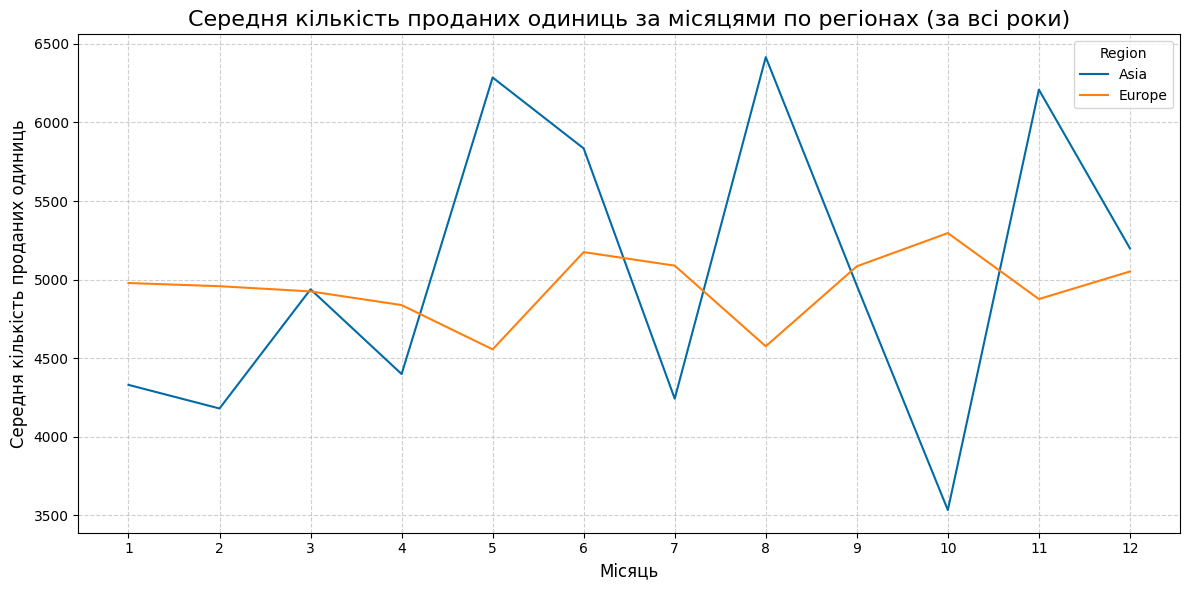

In [612]:
monthly_avg_sales_region = df_counties_cleaned.groupby(["Order Month", "Region"])["Units Sold"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_sales_region, x="Order Month", y="Units Sold", hue="Region")

plt.title("Середня кількість проданих одиниць за місяцями по регіонах (за всі роки)", fontsize=16)
plt.xlabel("Місяць", fontsize=12)
plt.ylabel("Середня кількість проданих одиниць", fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

##Аналіз в розрізі каналів продажу

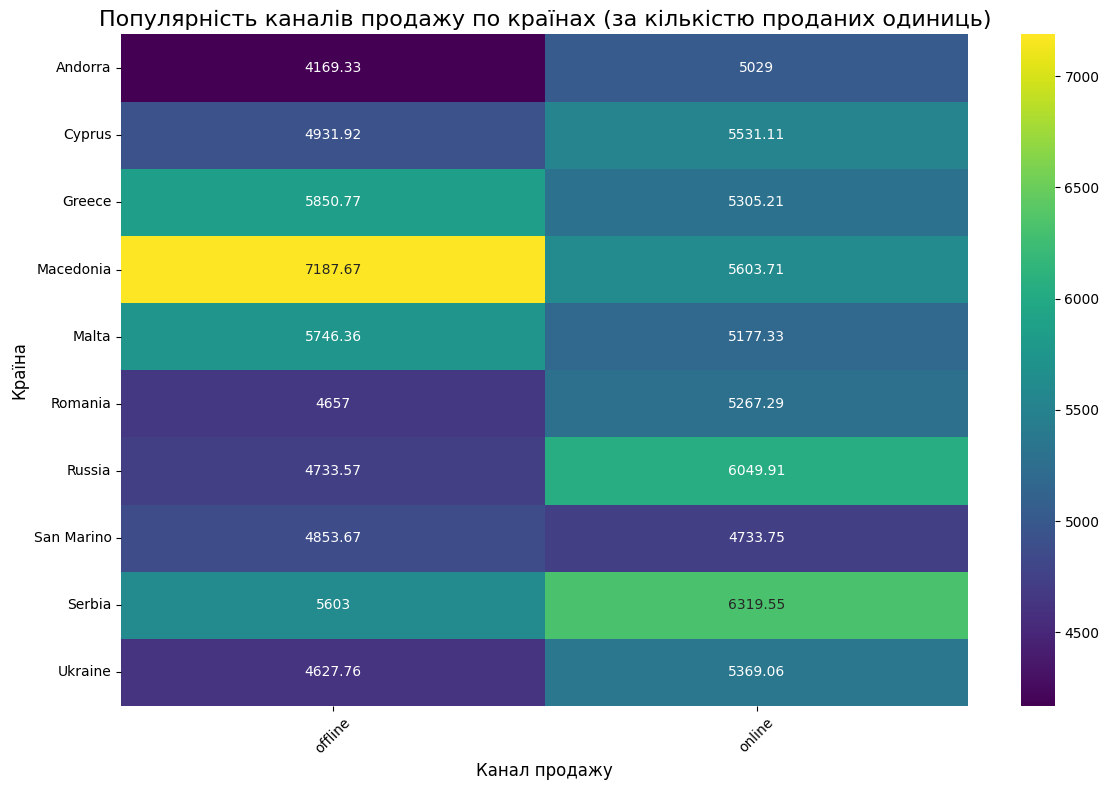

In [613]:

heatmap_data = filtered_df.pivot_table(
    index="Country",
    columns="Sales Channel",
    values="Units Sold",
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='g',
    cmap='viridis'
)

plt.title("Популярність каналів продажу по країнах (за кількістю проданих одиниць)", fontsize=16)
plt.ylabel("Країна", fontsize=12)
plt.xlabel("Канал продажу", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

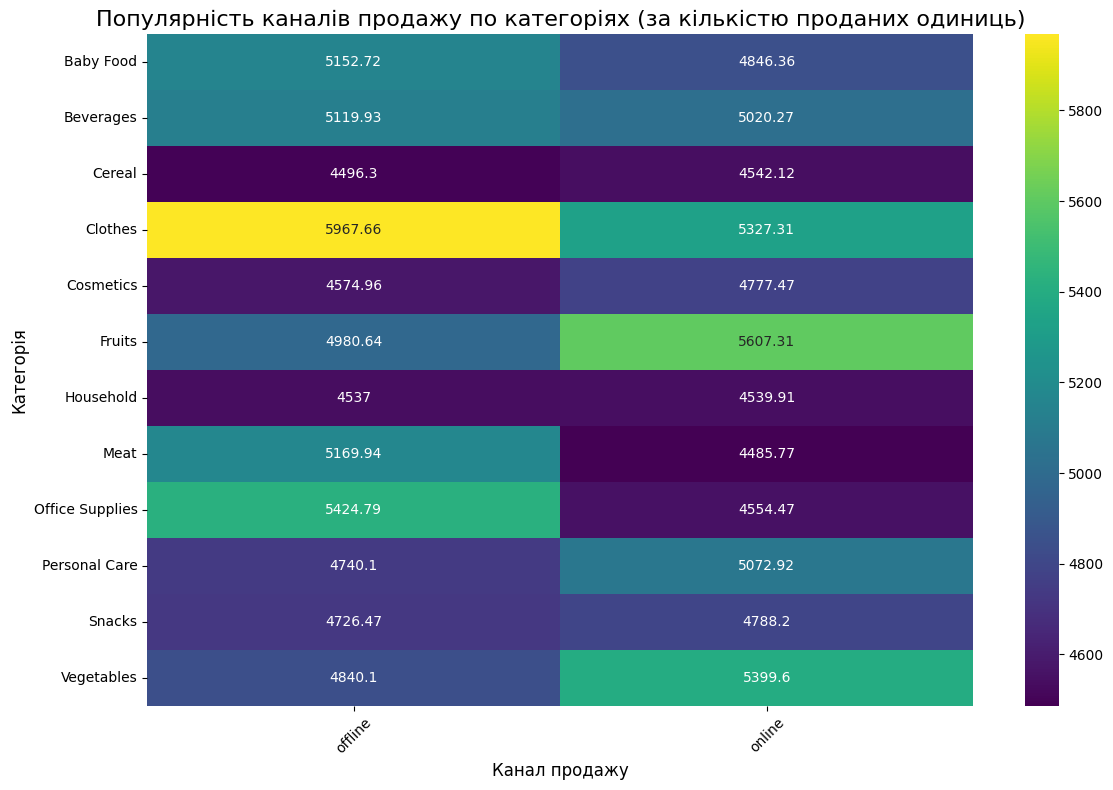

In [614]:
heatmap_data = df.pivot_table(
    index="Category",
    columns="Sales Channel",
    values="Units Sold",
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='g',
    cmap='viridis'
)

plt.title("Популярність каналів продажу по категоріях (за кількістю проданих одиниць)", fontsize=16)
plt.ylabel("Категорія", fontsize=12)
plt.xlabel("Канал продажу", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Тут досить теж все зрозуміло - одяг здебільшого купують офлайн, щоб краще підібрати розмір, м'ясо також. Інші продукти здебільшого купують або онлайн, або різниця між двома каналами невелика

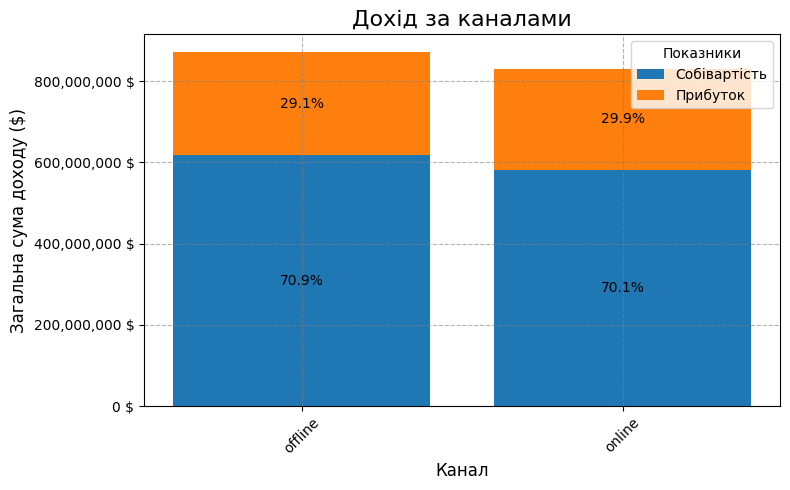

In [615]:
channel_summary = df.groupby("Sales Channel")[["Profit", "Total Cost", "Total Revenue"]].sum().reset_index()


plt.style.use("tableau-colorblind10")
plt.figure(figsize=(8, 5))
categories = channel_summary["Sales Channel"]
x = np.arange(len(categories))
total_revenue = channel_summary["Total Revenue"]


plt.grid(True, linestyle="--", color="gray", alpha=0.6)

plt.bar(x, channel_summary["Total Cost"], label="Собівартість", color="#1f77b4")
plt.bar(x, channel_summary["Profit"], bottom=channel_summary["Total Cost"], label="Прибуток", color="#ff7f0e")

for i in range(len(categories)):
        profit_percent = (channel_summary["Profit"][i] / total_revenue[i]) * 100
        cost_percent = (channel_summary["Total Cost"][i] / total_revenue[i]) * 100
        plt.text(x[i], channel_summary["Total Cost"][i] / 2, f'{cost_percent:.1f}%', ha="center", va="center", fontsize=10)
        plt.text(x[i], channel_summary["Total Cost"][i] + channel_summary["Profit"][i] / 2, f'{profit_percent:.1f}%', ha="center", va="center", fontsize=10)

plt.title("Дохід за каналами", fontsize=16)
plt.xlabel("Канал", fontsize=12)
plt.ylabel("Загальна сума доходу ($)", fontsize=12)
plt.xticks(x, categories, rotation=45)

# Форматування осі Y для відображення повних чисел
formatter = mtick.FuncFormatter(lambda y, p: f'{y:,.0f} $')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title="Показники")
plt.tight_layout()
plt.show()

Загалом обидва канали приносять майже однаковий відсоток прибутку, але скоріш всього дорогі речі замовляють більше офлайн - тому дохід у каналу більший.

##Залежність прибутку від часу

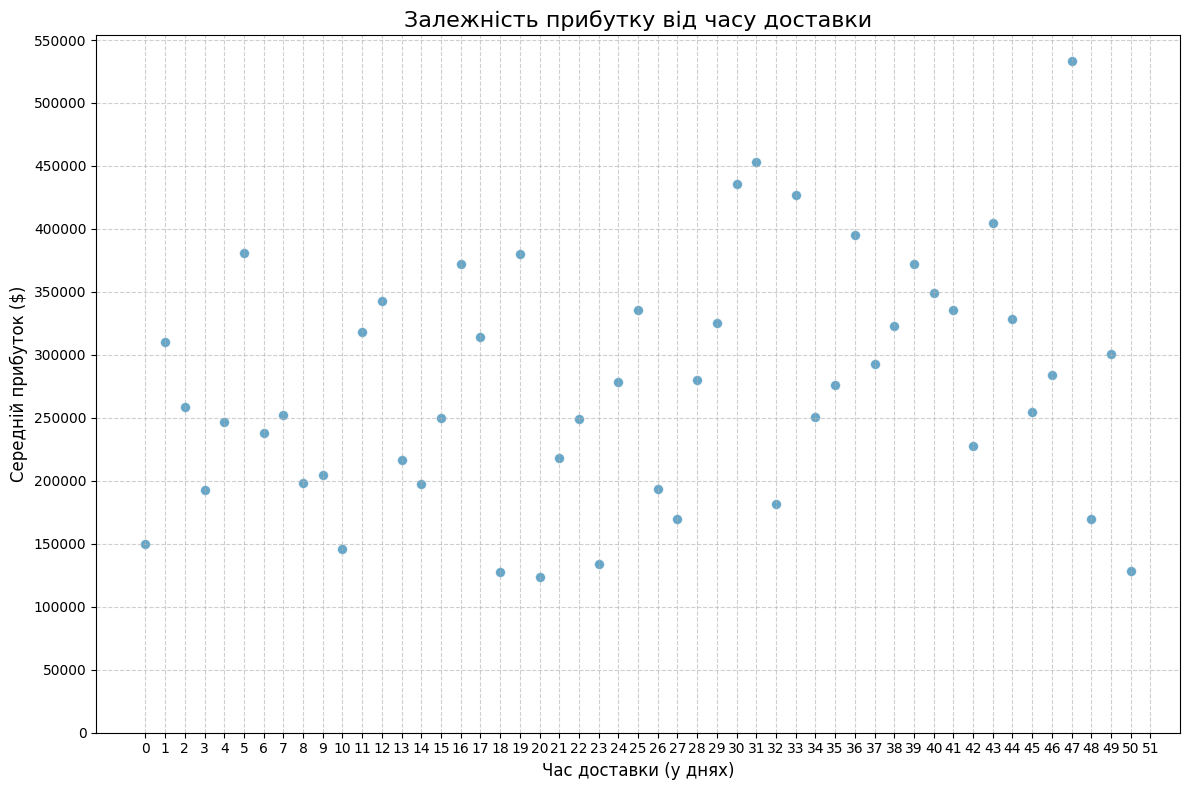

In [616]:
avg_profit_shipping_time = df.groupby("Shipping Time")["Profit"].median().reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Shipping Time",
    y="Profit",
    data=avg_profit_shipping_time,
    alpha=0.6,
    s=50
)

x_ticks = np.arange(0, avg_profit_shipping_time["Shipping Time"].max() + 2, 1)
plt.xticks(x_ticks)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 5, 50000)
plt.yticks(y_ticks)

plt.title("Залежність прибутку від часу доставки", fontsize=16)
plt.xlabel("Час доставки (у днях)", fontsize=12)
plt.ylabel("Середній прибуток ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

На графіку можна побачити, що закономірності між часом доставки замовлення і середнім прибутком здебільшого нема.

#Висновки

Перш за все, можна зробити висновок що популярність товарів і їхня прибутковість не співпадають. Хоча "Office Supplies" , "Beverages" та "Fruits" є найпопулярнішими категоріями за обсягом продажів, вони мають нижчу маржу, навідміну від "Clothes", "Cereal" та "Vegetables", які мають найвищу націнку та чистий прибуток. Можливо, можна розглянути варіант про підвищення ціни деяких товарів популярних категорій, або варіанти для підвищення продажів продуктів маржинальних категорій. До прикладу: як показав аналіз, одяг здебільшого купують в вихідні, тож саме на ці дні можна запускати рекламу.

Основний прибуток компанія отримує з країн Європи. Такі країни, як Македонія, Сан-Марино та Греція, лідирують за загальним обсягом продажів, тоді як Чехія, Україна та Боснія і Герцеговина приносять найбільший дохід.
Тут знову аналіз показує на те, що країни з найвищим доходом (Чехія, Україна) відрізняються від країн з найбільшим обсягом продажів (Македонія, Сан-Марино). На це впливає багато факторів, такі як:середня вартість замовлення може бути вищою/нижчою в одних країнах, клієнти купують дорожчі товари або більшу кількість товарів.

Теплова карта вказала, що як онлайн, так і офлайн канали в цілому є ефективними. Люди вважають за краще побачити та відчути дорогі товари перед покупкою, тому дорожчі товари частіше купують офлайн.

Відсутність сильної кореляції між часом доставки та прибутком є позитивним знаком. Це свідчить про те, що клієнти не зменшують свої покупки або не роблять менші замовлення лише через те, що доставка триває довше. Можливо товари з довшим періодом доставки мають певні проблеми в операційних процесах, по типу закуповування цього товару від інших постачальників, і варто подумати як оптимізовувати дані процеси.

Щодо поведінки протягом тижня: люди, як правило, купують одяг у п’ятницю та на вихідних, а тенденція купувати м’ясо та товари для дому на початку тижня може говорити про те, що люди закуповуються на тиждень вперед.

Дані показують компанію з міцним фундаментом у Європі. Існує значна можливість оптимізувати прибутковість, зосередившись на високомаржинальних категоріях. Компанія також має шанс покращити клієнтський досвід, усунувши логістичні проблеми в країнах з тривалим часом доставки.